## Image reconstruction of Pixel war using place dataset

Pixel war took place on reddit from the first of April 2022 to the fourth of April 2022
The dataset of all users actions was published today (06-04-2022) on the following link :
https://www.reddit.com/r/place/comments/txvk2d/rplace_datasets_april_fools_2022/

In [51]:
import pandas as pd
df = pd.read_csv("2022_place_canvas_history-000000000000.csv")

The dataset contains the timstamp at which each action of setting a pixel took place, the user_id of the user who sets the pixel, the color and the coordinate of the pixel

In [52]:
df

,timestamp,user_id,pixel_color,coordinate
0,2022-04-03 17:38:20.021 UTC,p0sXpmkcmg1KLiCdK5e4xKdudb1f8cjscGs35082sKpGBf...,#FF4500,"371,488"
1,2022-04-03 17:38:20.024 UTC,Ctar52ln5JEpXT+tVVc8BtQwm1tPjRwPZmPvuamzsZDlFD...,#51E9F4,"457,493"
2,2022-04-03 17:38:20.025 UTC,rNMF5wpFYT2RAItySLf9IcFZwOhczQhkRhmTD4gv0K78Dp...,#000000,"65,986"
3,2022-04-03 17:38:20.025 UTC,u0a7l8hHVvncqYmav27EARAE6ciLtpUTPXMI33lDrUmtj5...,#3690EA,"73,961"
4,2022-04-03 17:38:20.026 UTC,L8P+AXoFbbXPh2zBAkkXk96UrkKpB5hLq5gBMwvgSV0H4f...,#FF4500,"1865,290"
...,...,...,...,...
1900739,2022-04-03 18:22:31.517 UTC,7X+K1nIZ9eBAZj3yxrSNFG33jIMSKaiS7AGGtzt+DG6jbs...,#898D90,"178,593"
1900740,2022-04-03 18:22:31.518 UTC,bpW54OZm6y3PWrz3t9ZyqOXnk1aIyEC9jXKinZAeGkdOqs...,#6A5CFF,"1083,520"
1900741,2022-04-03 18:22:31.518 UTC,dAy0nZAW1LZRD9/q+sl6BAmjmEBVc9NLy8xxyWMFJAac2J...,#000000,"162,24"
1900742,2022-04-03 18:22:31.519 UTC,MB7wpyWzXIsNvltddytPIbJ3vcINDFigZM51fmvLp8/ffj...,#BE0039,"1695,393"


The game environment was a 2000x2000 pixels image

We will try to reconstruct an image after some hours from the begenning of the game

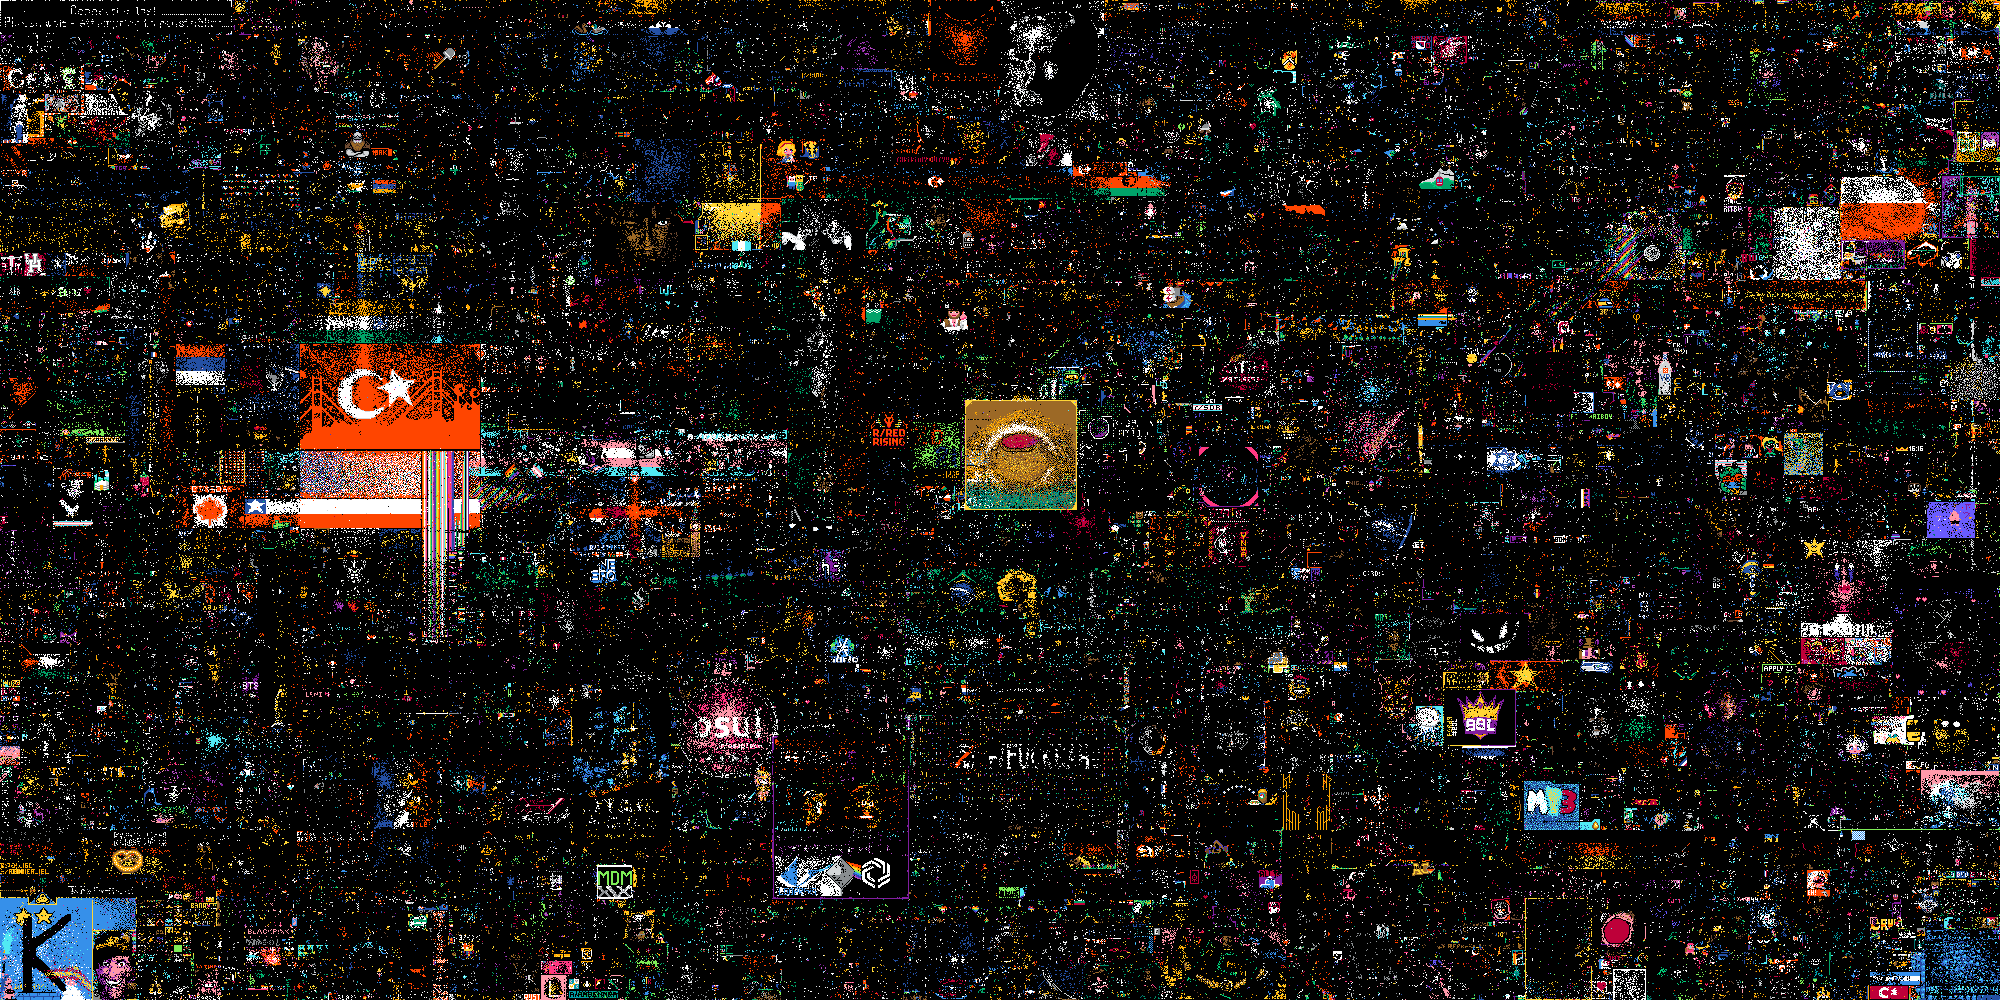

In [53]:
from PIL import Image, ImageColor
img = Image.new('RGB', (2000, 1000))
for ind in df.index:
    color = df['pixel_color'][ind]
    coordinate = df['coordinate'][ind]
    x = int(coordinate.split(",")[0])
    y = int(coordinate.split(",")[1])
    #print(x,y)
    rgbColor = ImageColor.getcolor(color, "RGB")
    #print(rgbColor)
    img.putpixel((x,y), rgbColor)
img.save('image1.png')
display(img)

## Concatinating 6 files

We try to merge 6 csv files in one file

In [75]:
import os
import glob
import pandas as pd
os.chdir("PixelWar")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [80]:
import pandas as pd
df = pd.read_csv("combined_csv.csv")


In [81]:
df

,timestamp,user_id,pixel_color,coordinate
0,2022-04-03 17:38:20.021 UTC,p0sXpmkcmg1KLiCdK5e4xKdudb1f8cjscGs35082sKpGBf...,#FF4500,"371,488"
1,2022-04-03 17:38:20.024 UTC,Ctar52ln5JEpXT+tVVc8BtQwm1tPjRwPZmPvuamzsZDlFD...,#51E9F4,"457,493"
2,2022-04-03 17:38:20.025 UTC,rNMF5wpFYT2RAItySLf9IcFZwOhczQhkRhmTD4gv0K78Dp...,#000000,"65,986"
3,2022-04-03 17:38:20.025 UTC,u0a7l8hHVvncqYmav27EARAE6ciLtpUTPXMI33lDrUmtj5...,#3690EA,"73,961"
4,2022-04-03 17:38:20.026 UTC,L8P+AXoFbbXPh2zBAkkXk96UrkKpB5hLq5gBMwvgSV0H4f...,#FF4500,"1865,290"
...,...,...,...,...
21486702,2022-04-02 12:18:02.248 UTC,OgOFInNuYF6B0yjruIb5KFDo3kcHyomjlvA8Y1LDdnInAZ...,#000000,"111,76"
21486703,2022-04-02 12:18:02.249 UTC,msSCDcU6kU5at/HBRZF8yXIsyFI1Lz6DlIAuDPbUIylUzJ...,#FFA800,"105,768"
21486704,2022-04-02 12:18:02.252 UTC,EmHwFAxRPjVxJFYj1pWHlvFH5YYxpZkLx3EU8OlWTXntXD...,#FFD635,"486,879"
21486705,2022-04-02 12:18:02.266 UTC,fXh9IRd4No98pIxU13ZNmAShwXVkf9Kj4HD6MUIUaehx2N...,#FFFFFF,"30,662"


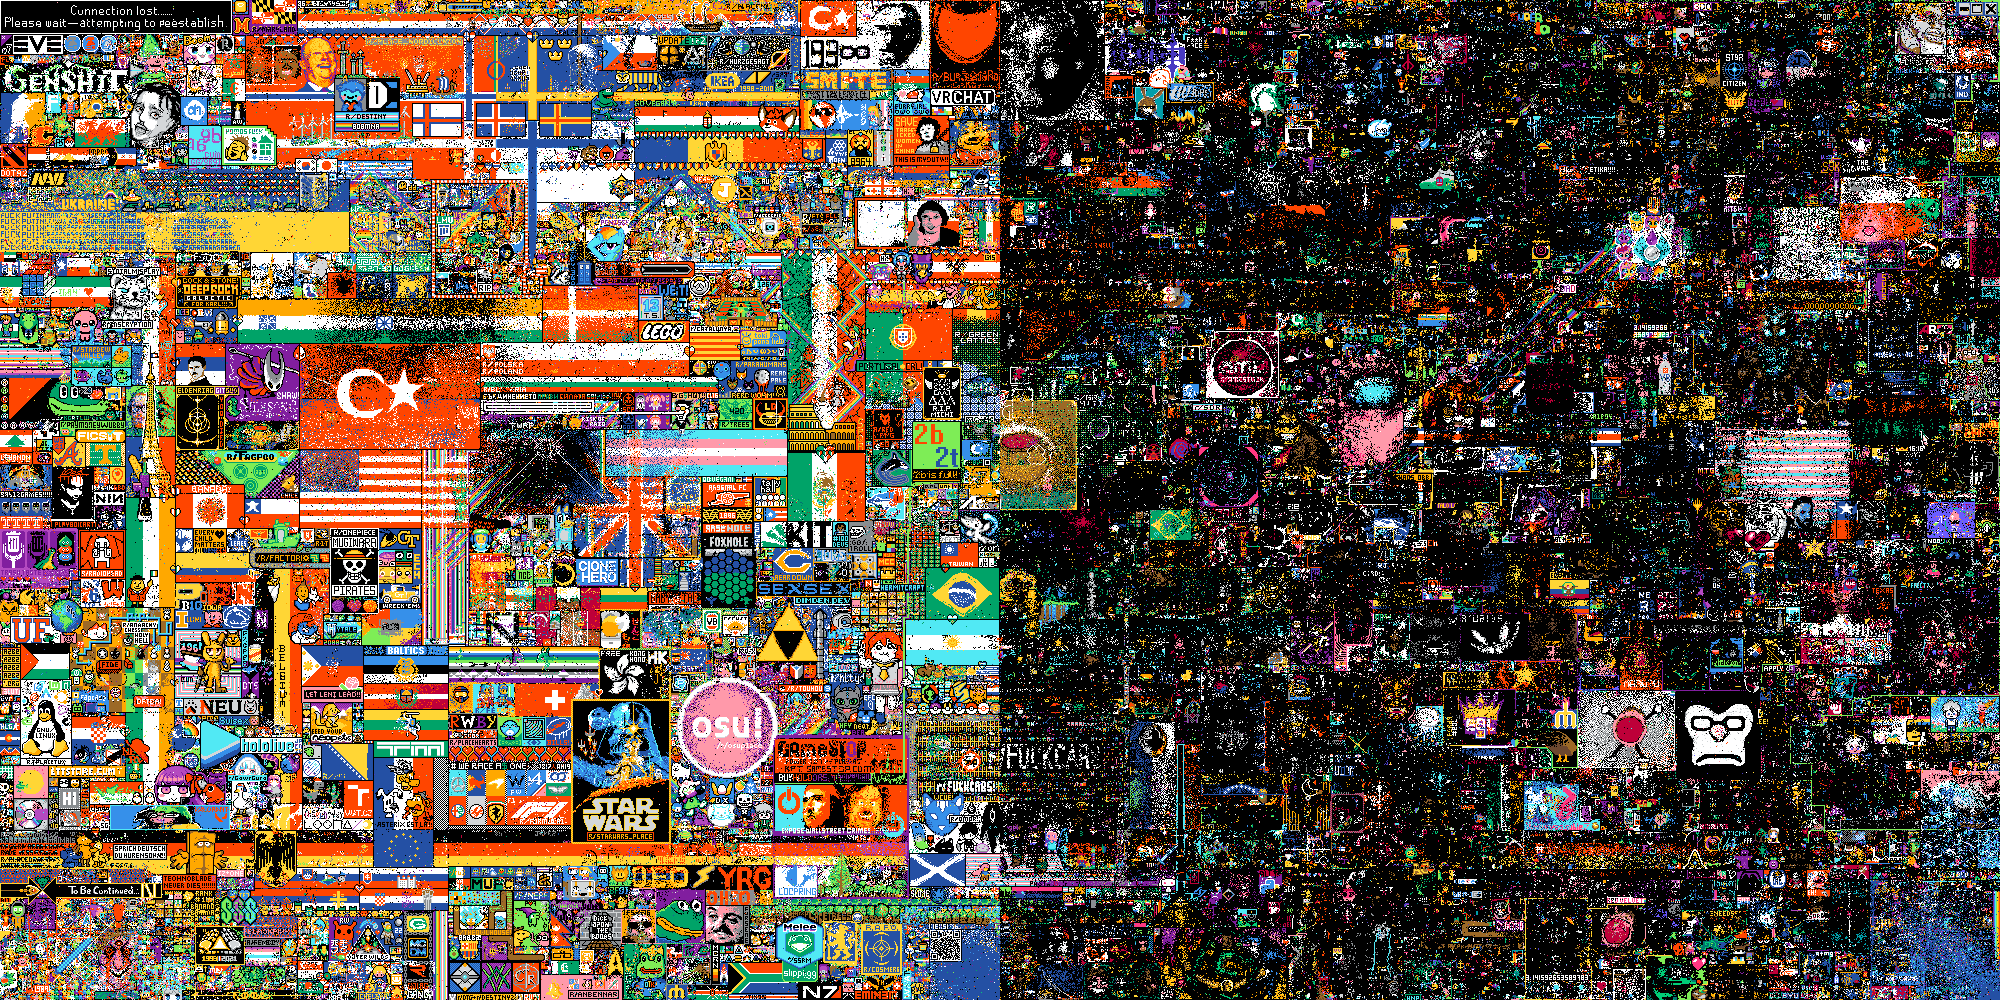

In [82]:
img = Image.new('RGB', (2000, 1000))
i = 0
for ind in df.index:
    color = df['pixel_color'][ind]
    coordinate = df['coordinate'][ind]
    x = int(coordinate.split(",")[0])
    y = int(coordinate.split(",")[1])
    #print(x,y)
    rgbColor = ImageColor.getcolor(color, "RGB")
    #print(rgbColor)
    img.putpixel((x,y), rgbColor)
img.save('sqr6.png')
display(img)

## To do

Search for the user who changed the most pixel in the game

Search for the number of actions made by the most active user, multiple the resut by 5 minutes and see if the result is not superior than the duration of the game (otherwise the game was hacked)

Detect bots

Flow of attacks

# Generating timelapse

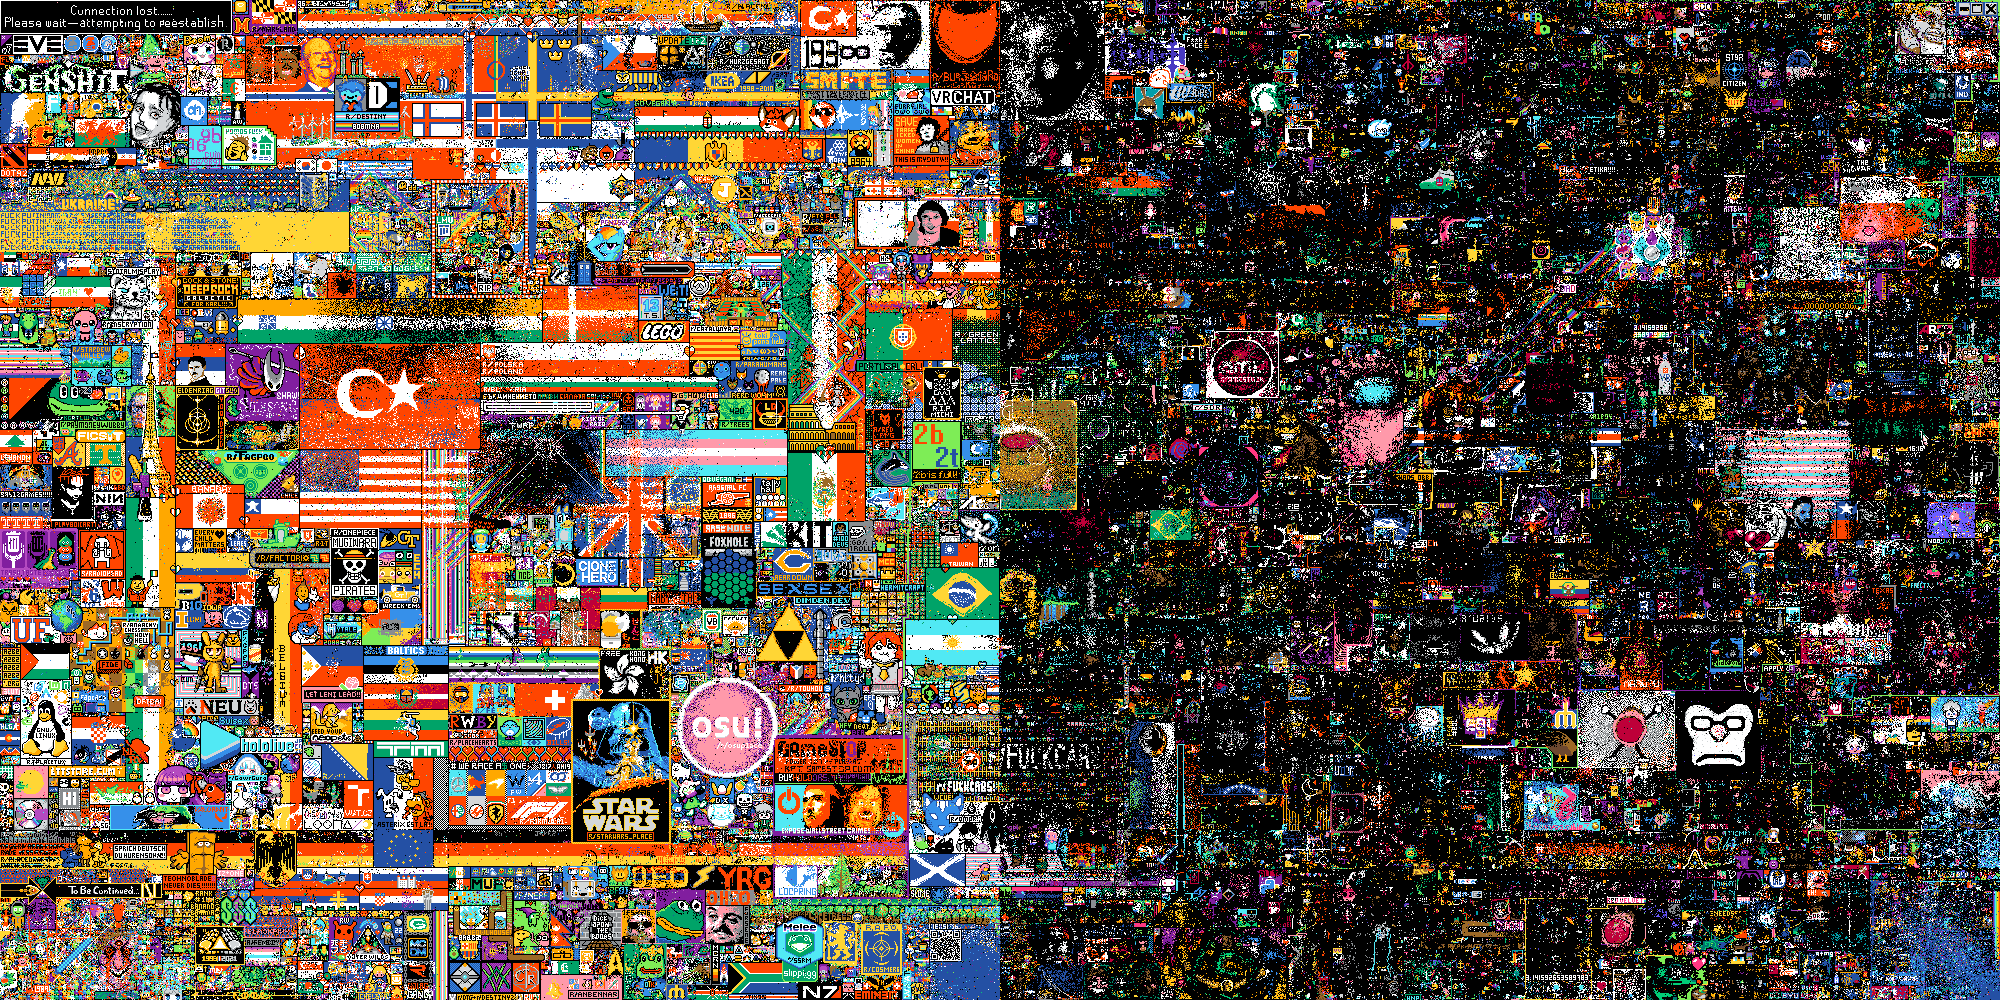

In [77]:
img = Image.new('RGB', (2000, 1000))
i = 0
for ind in df.index:
    color = df['pixel_color'][ind]
    coordinate = df['coordinate'][ind]
    x = int(coordinate.split(",")[0])
    y = int(coordinate.split(",")[1])
    #print(x,y)
    rgbColor = ImageColor.getcolor(color, "RGB")
    #print(rgbColor)
    img.putpixel((x,y), rgbColor)
    i += 1
    if i%50000 == 0 :
        imageName = "images/image"+ "%010d" % (i,)+".png"
        img.save(imageName)
img.save('sqr6.png')
display(img)

In [78]:
import cv2
import numpy as np
import glob
 
img_array = []
allImages = glob.glob('/*.png')
allImagesSorted = sorted(allImages)


for filename in allImagesSorted:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()